### **Visa-Approval-Prediction: Machine Learning Project Life Cycle**

This notebook walks through the entire machine learning project life cycle to predict visa approval outcomes. The key steps include:

1. Understanding the Problem Statement
3. Data Checks
4. Exploratory Data Analysis (EDA)
5. Data Pre-Processing
6. Model Training
7. Model Selection

---

### **Understanding the Problem Statement**

In this project, we aim to predict visa application approval based on factors like:

- Applicant's personal information
- Financial status
- Travel history
- Demographic and other relevant travel data

This is framed as a **binary classification problem** with the following outcomes:
- Approved (1)
- Rejected (0)

---

#### **Machine Learning Project Life Cycle**

1. **Data Ingestion**: Collect and load data from various sources (CSV, databases, etc.).
2. **Data Transformation**: Clean and preprocess data (handling missing values, encoding features).
3. **Model Training**: Train various machine learning models on the data.
4. **Prediction Pipeline**: Build a pipeline for model deployment and real-time predictions.


#### **2.1 Import Data and Required Packages**

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### **Load the dataset**

In [4]:
# Load the dataset
file_path = 'D:\Visa-Approval-Prediction\artifacts\data_ingestion\Visa_Predection_Dataset.csv'
visa_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### **Shape of the dataset**

In [5]:
visa_df.shape

(25480, 12)

#### **Dataset Summary**

This dataset provides detailed information about visa application cases, including applicant demographics, job details, and final case outcomes. The data can be utilized to analyze trends and factors affecting visa approvals. Below is a description of the dataset's structure and key insights:

#### **Dataset Description**

| **Column Name**          | **Description**                                         |
|---------------------------|--------------------------------------------------------|
| `case_id`                | Unique identifier for each visa application.            |
| `continent`              | Continent where the employee originates.                |
| `education_of_employee`  | Employee's highest education level.                     |
| `has_job_experience`     | Indicates prior job experience (`Y`/`N`).               |
| `requires_job_training`  | Specifies if the job requires training (`Y`/`N`).       |
| `no_of_employees`        | Number of employees in the hiring organization.         |
| `yr_of_estab`            | Year of establishment of the hiring organization.       |
| `region_of_employment`   | Region where the job is located.                        |
| `prevailing_wage`        | Wage offered for the job role.                          |
| `unit_of_wage`           | Unit for the prevailing wage (e.g., Hour, Year).        |
| `full_time_position`     | Indicates if the position is full-time (`Y`/`N`).       |
| `case_status`            | Outcome of the visa application (`Certified`/`Denied`). |

### **Key Highlights**

#### **1. Total Records**
- The dataset contains **5 sample visa application cases**.

#### **2. Applicant Details**
- **Education Levels**: High School, Bachelor's, and Master's degrees are represented.
- **Continents**: Employees come from Asia and Africa.
- **Job Experience**: Mixed presence of prior job experience among applicants.

#### **3. Company Insights**
- **Organization Size**: Employee counts range from small businesses (98 employees) to large enterprises (44,444 employees).
- **Establishment Timeline**: Companies' founding years vary widely, from **1897** to **2008**.
- **Regional Distribution**: Jobs are located in regions like the West, Northeast, and South.

#### **4. Case Outcomes**
- **Certified Cases**: 40% (2 out of 5 cases).
- **Denied Cases**: 60% (3 out of 5 cases).

### **Analytical Potential**

This dataset is well-suited for:
1. Identifying key factors that influence visa application approvals.
2. Exploring the impact of employee and company characteristics on case outcomes.
3. Analyzing wage trends and regional employment distribution.
4. Deriving actionable insights for employers and policymakers to improve visa approval success rates.

### **Exploratory Data Analysis (EDA)**

**Purpose:**
To uncover underlying patterns and insights in the data.

**Techniques:**
- **Visualizations**: Use scatter plots, box plots, and correlation matrices.
- **Data Quality Checks**: Analyze missing values, duplicates, and outliers.

### **1. Data Quality Checks**

In [6]:
# Check for missing values
print("\n### Missing Values Check ###")
missing_values = visa_df.isnull().sum()
print(missing_values[missing_values > 0])


### Missing Values Check ###
Series([], dtype: int64)


In [7]:
# Check for duplicates
print("\n### Duplicates Check ###")
duplicates = visa_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")



### Duplicates Check ###
Number of duplicate rows: 0


In [8]:
# Check for outliers (using IQR for numerical columns)
print("\n### Outliers Check ###")
numerical_columns = visa_df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    Q1 = visa_df[column].quantile(0.25)
    Q3 = visa_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = visa_df[(visa_df[column] < lower_bound) | (visa_df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {outliers.shape[0]}")


### Outliers Check ###
Number of outliers in no_of_employees: 1556
Number of outliers in yr_of_estab: 3260
Number of outliers in prevailing_wage: 427


In [9]:
import pandas as pd

# Function to handle outliers using IQR method
def handle_outliers(df, columns):
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Removing outliers: Keeping only rows within the lower and upper bounds
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
    return df

# Columns to check for outliers
numerical_columns = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

# Handle outliers by removing them
cleaned_df = handle_outliers(visa_df, numerical_columns)

# Print the shape before and after handling outliers
print(f"Original dataset shape: {visa_df.shape}")
print(f"Cleaned dataset shape: {cleaned_df.shape}")


Original dataset shape: (25480, 12)
Cleaned dataset shape: (20530, 12)


#### **Visualizations** 


In [ ]:
# Scatter Plot Matrix (Pairplot)
sns.pairplot(cleaned_df, hue='case_status', diag_kind='hist', palette='viridis') 
plt.suptitle("Scatter Plot Matrix", fontsize=16)
plt.show()

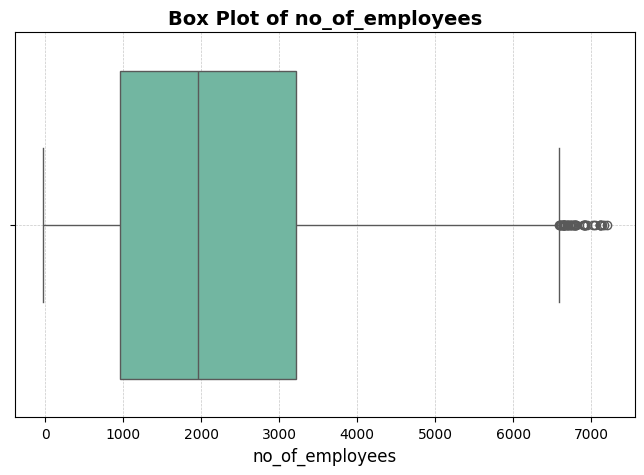

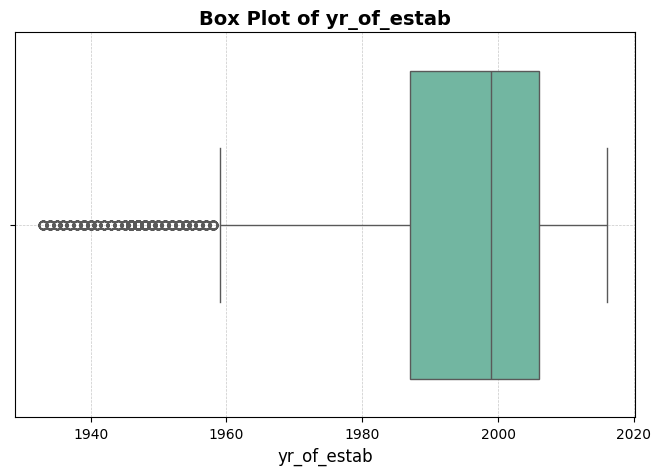

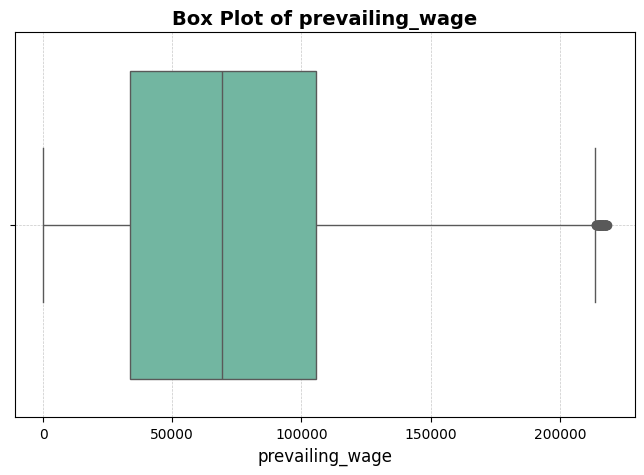

In [43]:
# Box Plots for Numerical Features
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=cleaned_df[column], palette='Set2')
    plt.title(f"Box Plot of {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

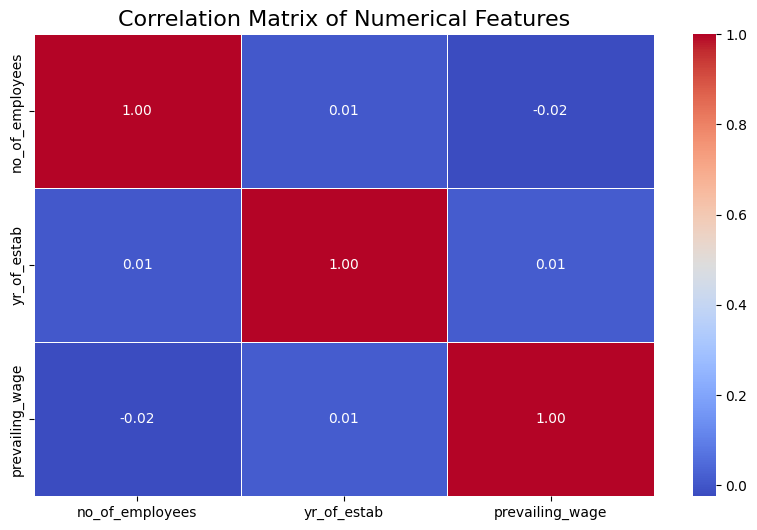

In [44]:
# Correlation Matrix Heatmap
correlation_matrix = cleaned_df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()

### **Descriptive Analysis**

**Purpose:**
To summarize and describe the main features of the dataset.

**Techniques:**
- **Summary Statistics**: Calculate mean, median, standard deviation, etc.
- **Tables for Category Frequencies**: Display the frequency of each category in categorical variables.

In [45]:
# Summary statistics for numerical columns
numerical_summary = cleaned_df.describe()

# Print the summary statistics for numerical columns
print("### Summary Statistics for Numerical Columns ###")
print(numerical_summary)


### Summary Statistics for Numerical Columns ###
       no_of_employees   yr_of_estab  prevailing_wage
count     20530.000000  20530.000000     20530.000000
mean       2190.272236   1993.850414     71672.423790
std        1485.936851     16.828586     47986.380888
min         -26.000000   1933.000000         2.136700
25%         955.250000   1987.000000     33603.382500
50%        1963.500000   1999.000000     69282.940000
75%        3209.000000   2006.000000    105671.612500
max        7195.000000   2016.000000    218094.610000


In [48]:
# Frequency count for categorical columns
categorical_columns = cleaned_df.select_dtypes(include=['object']).columns

print("### Frequency of Categories in Categorical Columns ###")
for column in categorical_columns:
    print(f"\nCategory distribution for {column}:")
    print(cleaned_df[column].value_counts())


### Frequency of Categories in Categorical Columns ###

Category distribution for case_id:
case_id
EZYV02       1
EZYV17156    1
EZYV17026    1
EZYV17025    1
EZYV17024    1
            ..
EZYV8512     1
EZYV8511     1
EZYV8510     1
EZYV8509     1
EZYV25480    1
Name: count, Length: 20530, dtype: int64

Category distribution for continent:
continent
Asia             13662
Europe            2977
North America     2643
South America      662
Africa             435
Oceania            151
Name: count, dtype: int64

Category distribution for education_of_employee:
education_of_employee
Bachelor's     8350
Master's       7684
High School    2749
Doctorate      1747
Name: count, dtype: int64

Category distribution for has_job_experience:
has_job_experience
Y    11923
N     8607
Name: count, dtype: int64

Category distribution for requires_job_training:
requires_job_training
N    18187
Y     2343
Name: count, dtype: int64

Category distribution for region_of_employment:
region_of_employment
N

### **Univariate Analysis**

**Purpose:** 
To analyze individual variables to understand their distributions, central tendencies, and variations.

**Techniques:**
- **Numerical Features**: Use histograms or density plots.
- **Categorical Features**: Use pie charts or bar plots.


### Univariate Analysis: Numerical Features ###


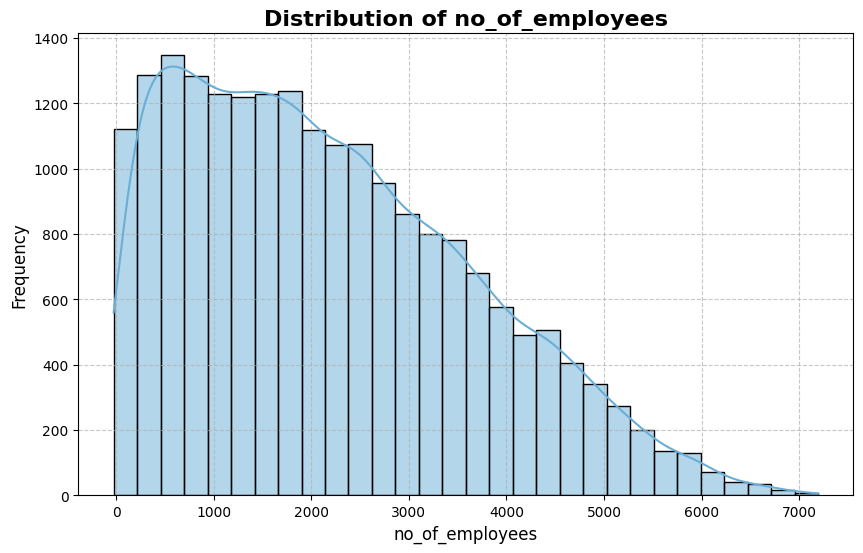

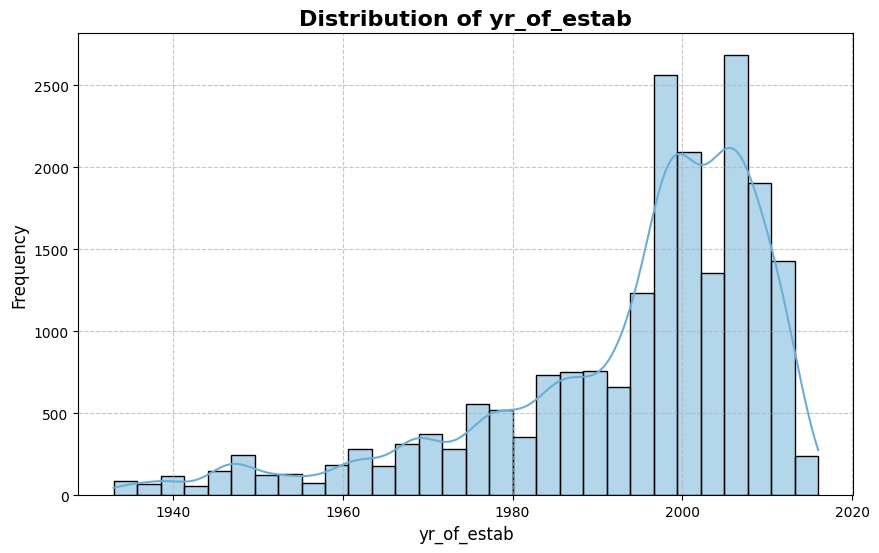

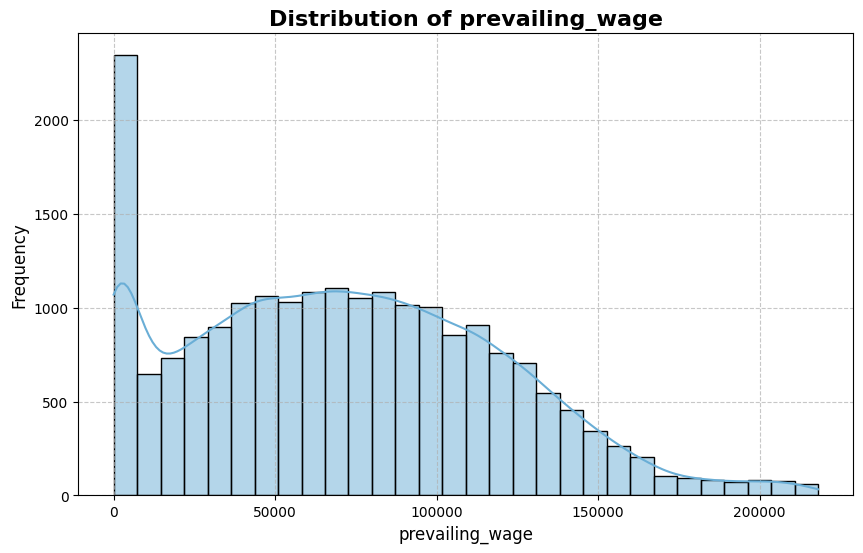

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

print("### Univariate Analysis: Numerical Features ###")
# Visualizing the distribution of numerical columns with professional colors
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    # Using Seaborn's color palette for a professional look
    sns.histplot(cleaned_df[column], kde=True, bins=30, color=sns.color_palette("Blues", 1)[0])  # Blue color from Seaborn's Blues palette
    plt.title(f'Distribution of {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


### Univariate Analysis: Categorical Features ###


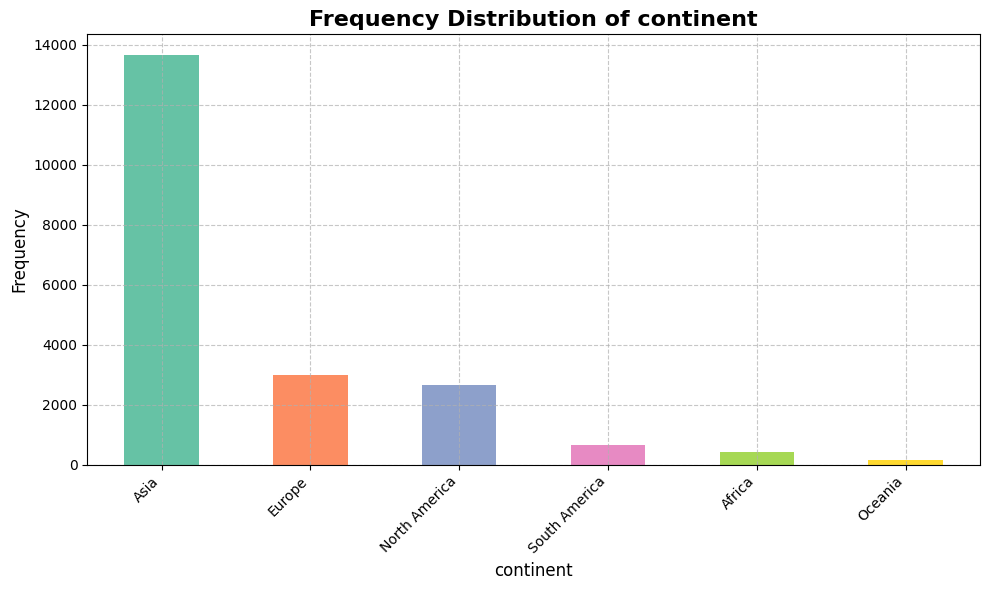

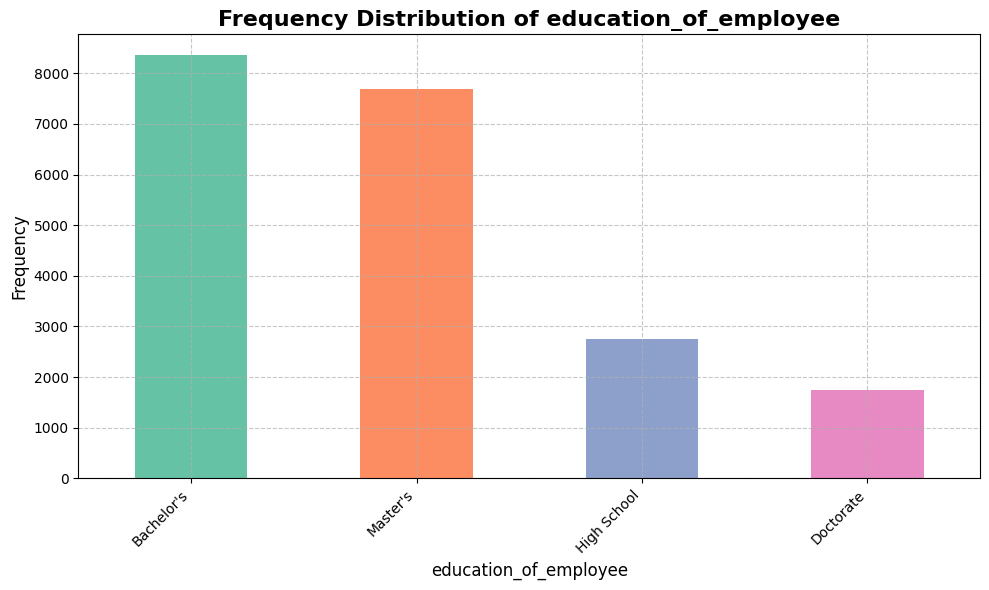

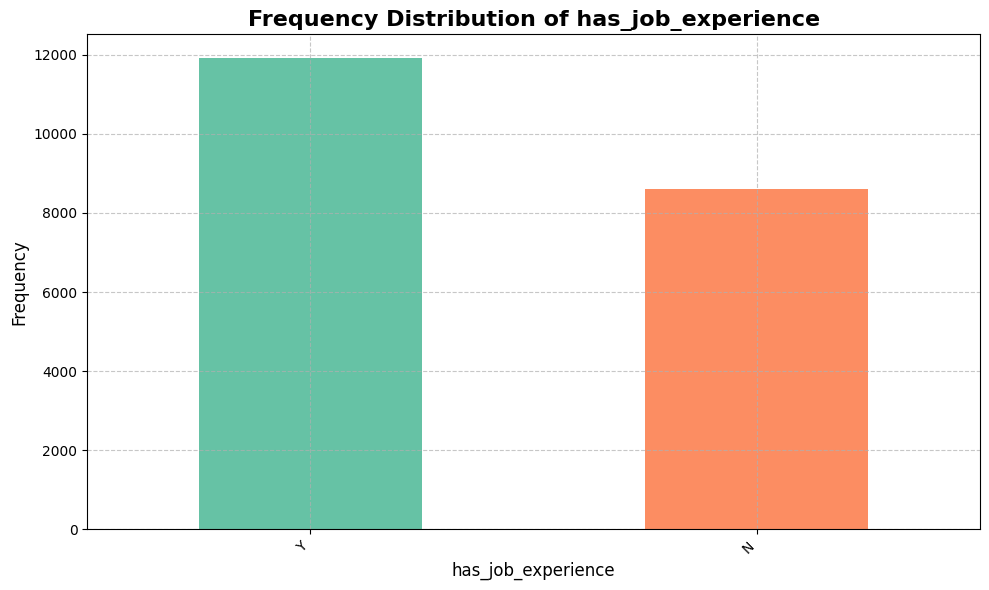

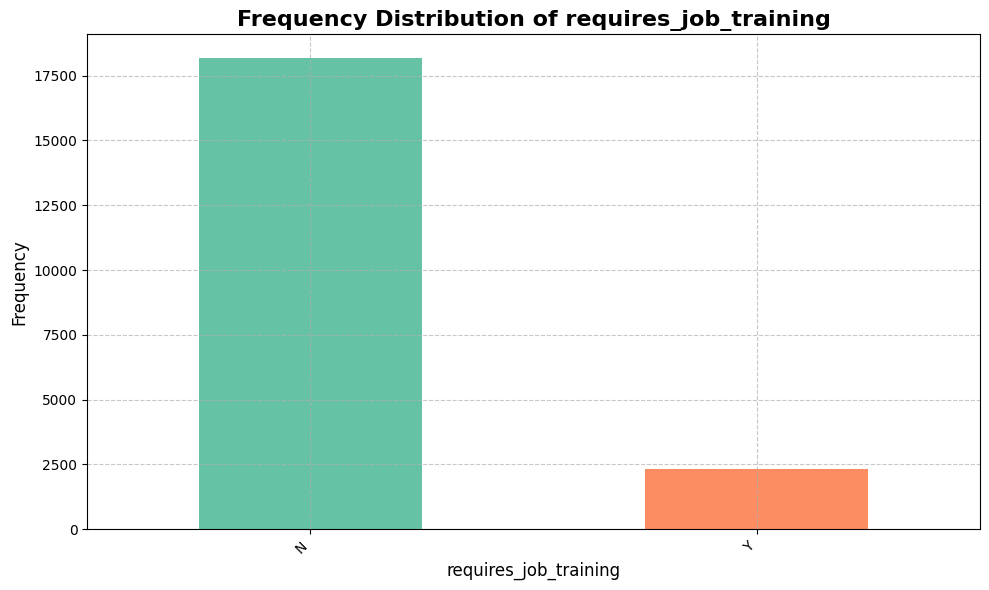

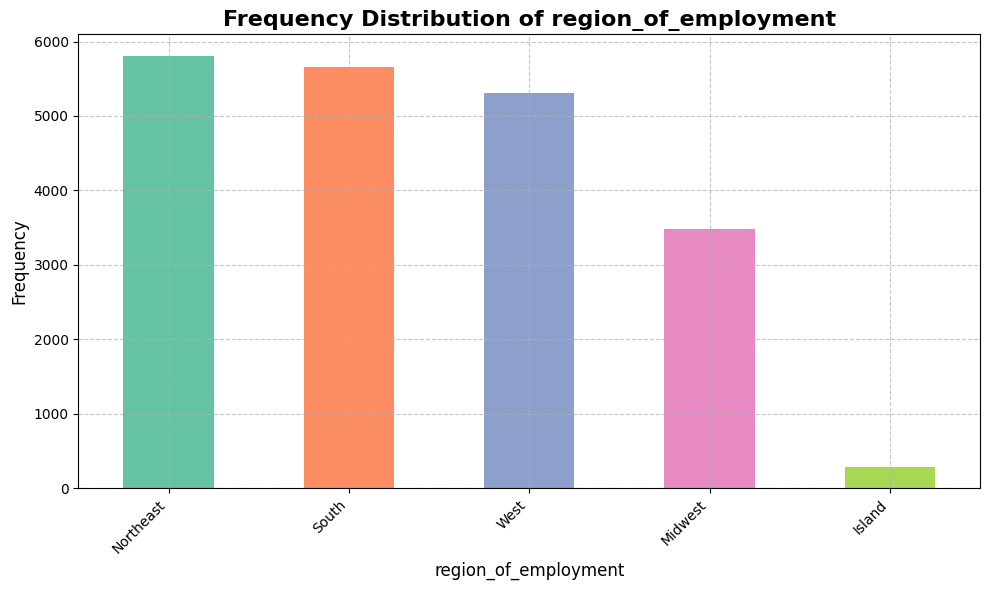

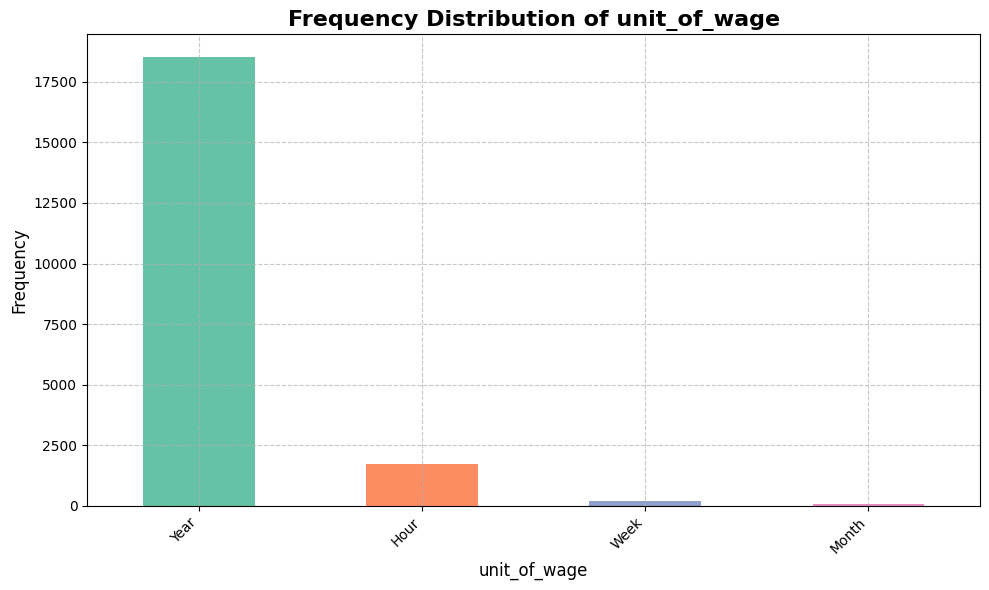

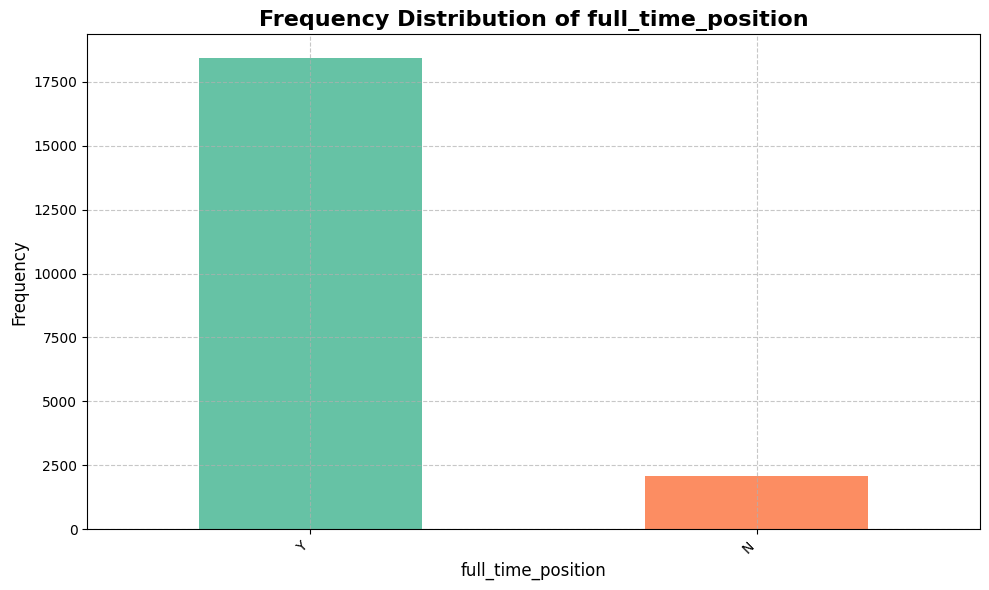

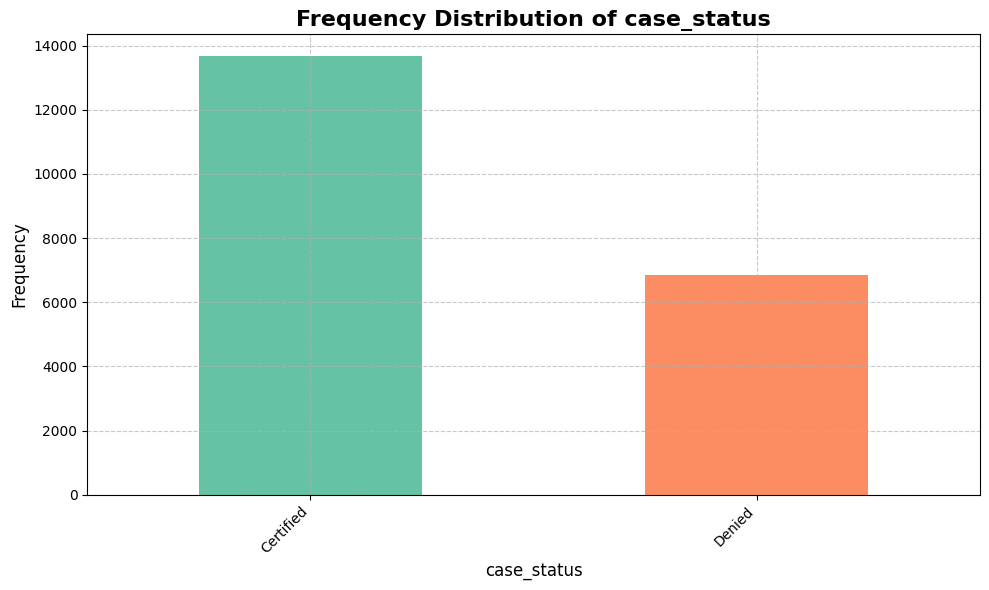

In [12]:
# List of categorical columns, excluding 'case_id'
categorical_columns = cleaned_df.select_dtypes(include=['object']).columns

# Exclude 'case_id' from the categorical columns list if it exists
categorical_columns = [col for col in categorical_columns if col != 'case_id']

print("### Univariate Analysis: Categorical Features ###")
# Visualizing the distribution of categorical columns with professional colors
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    # Using Seaborn's 'Set2' palette for better color aesthetics
    cleaned_df[column].value_counts().plot(kind='bar', color=sns.color_palette("Set2", len(cleaned_df[column].value_counts())))

    plt.title(f'Frequency Distribution of {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### **Bivariate Analysis**

**Purpose:**
Explore the relationship between two variables, particularly between features and the target variable.

**Techniques:**

- **Numerical vs. Target**: Use violin plots to visualize the distribution of numerical features against the target.
- **Categorical vs. Target**: Use stacked bar charts to show the proportion of target categories within each categorical feature.

### Bivariate Analysis: Numerical Features vs Target ###


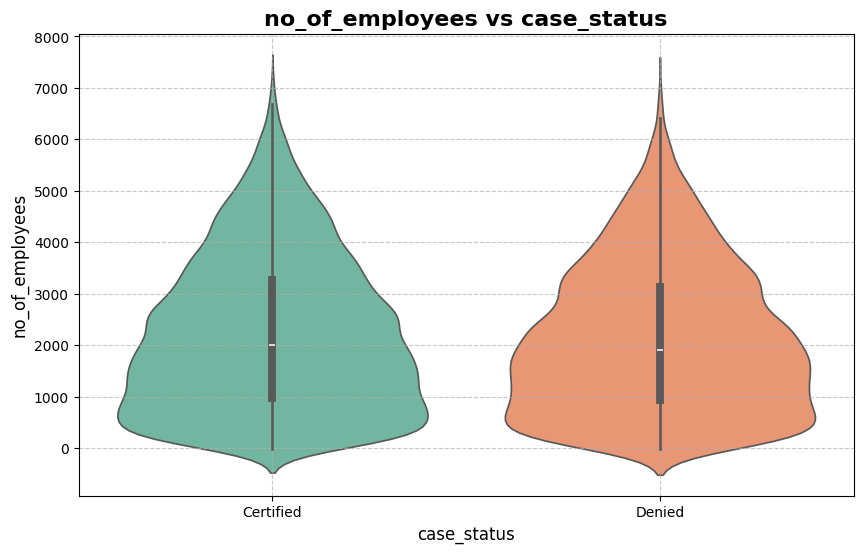

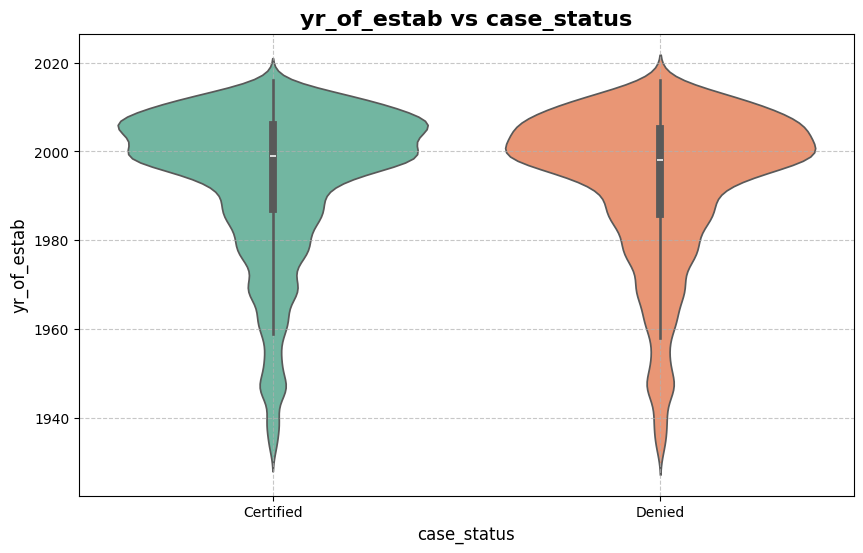

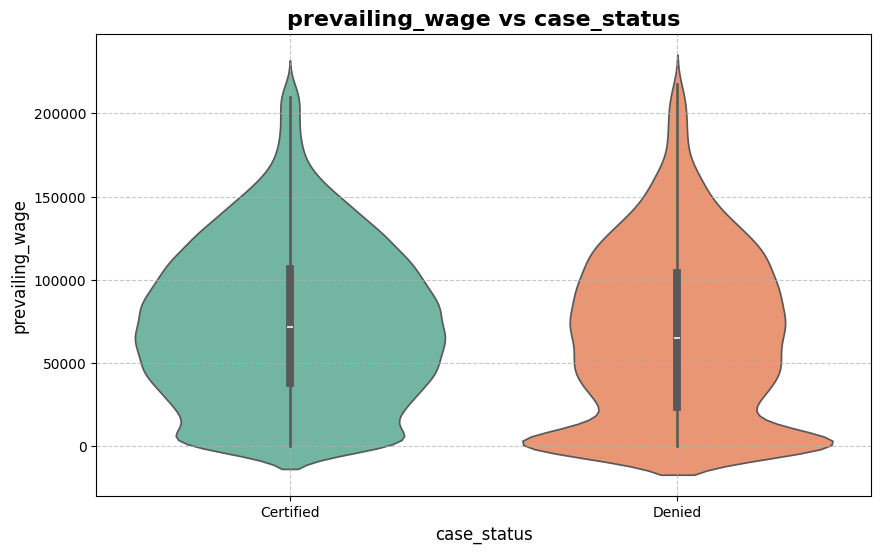

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Target variable
target = 'case_status'

# List of numerical columns
numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

print("### Bivariate Analysis: Numerical Features vs Target ###")
# Visualizing the relationship between numerical features and the target using violin plots
for column in numerical_columns:
    if column != target:
        plt.figure(figsize=(10, 6))
        sns.violinplot(data=cleaned_df, x=target, y=column, palette="Set2")
        plt.title(f'{column} vs {target}', fontsize=16, fontweight='bold')
        plt.xlabel(target, fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()


### Bivariate Analysis: Categorical Features vs Target ###


<Figure size 1000x600 with 0 Axes>

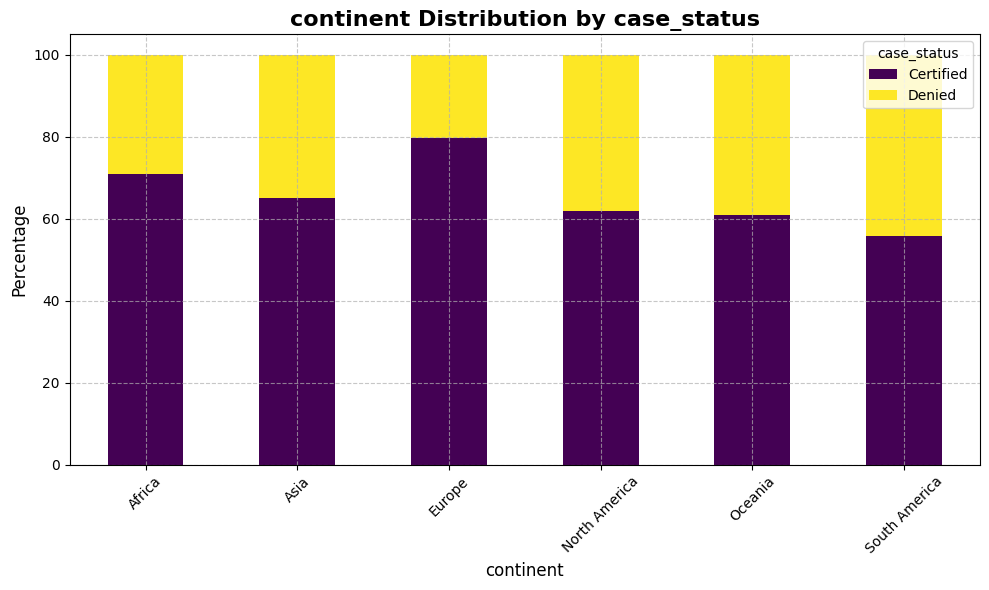

<Figure size 1000x600 with 0 Axes>

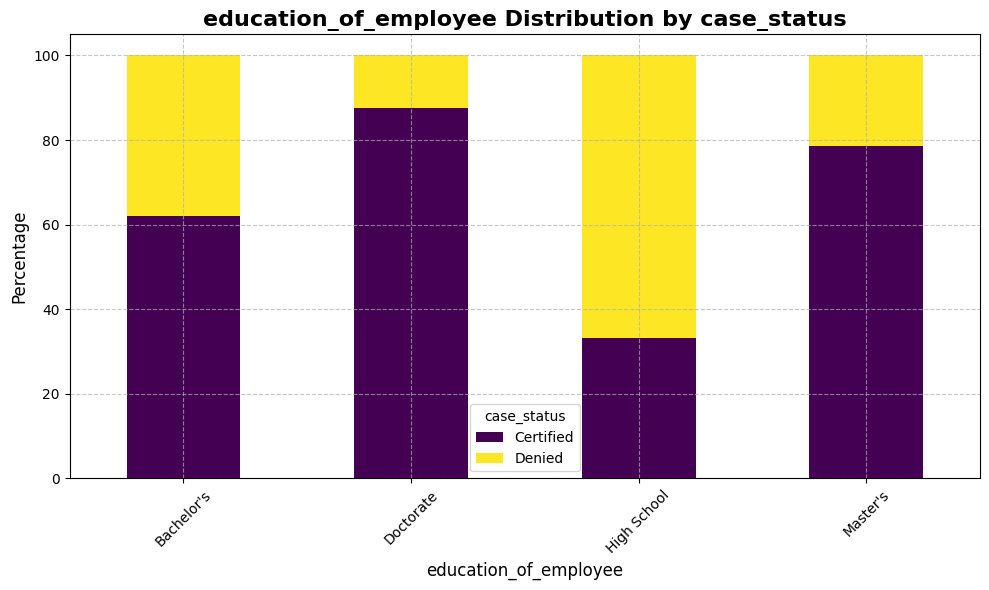

<Figure size 1000x600 with 0 Axes>

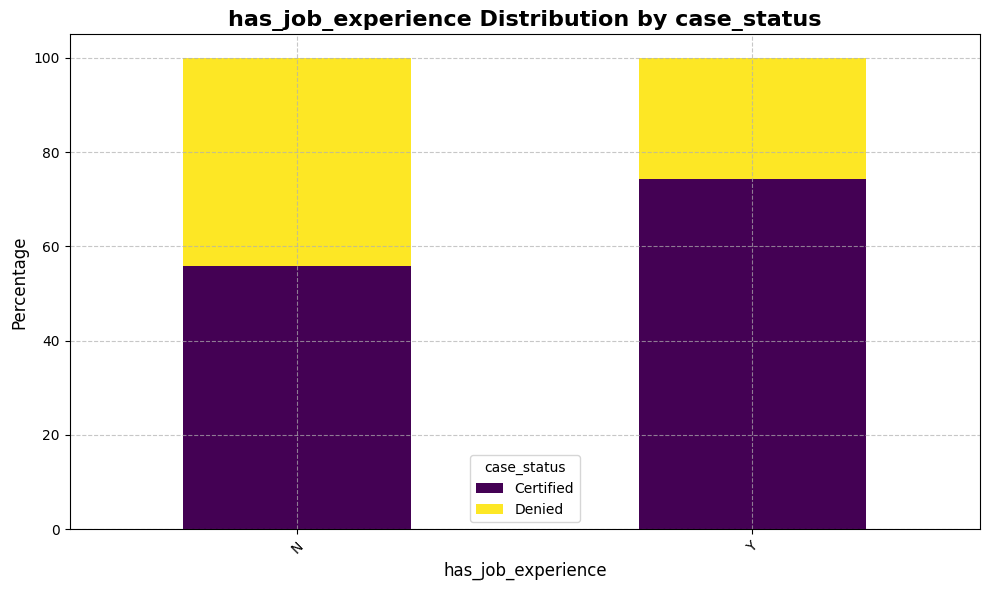

<Figure size 1000x600 with 0 Axes>

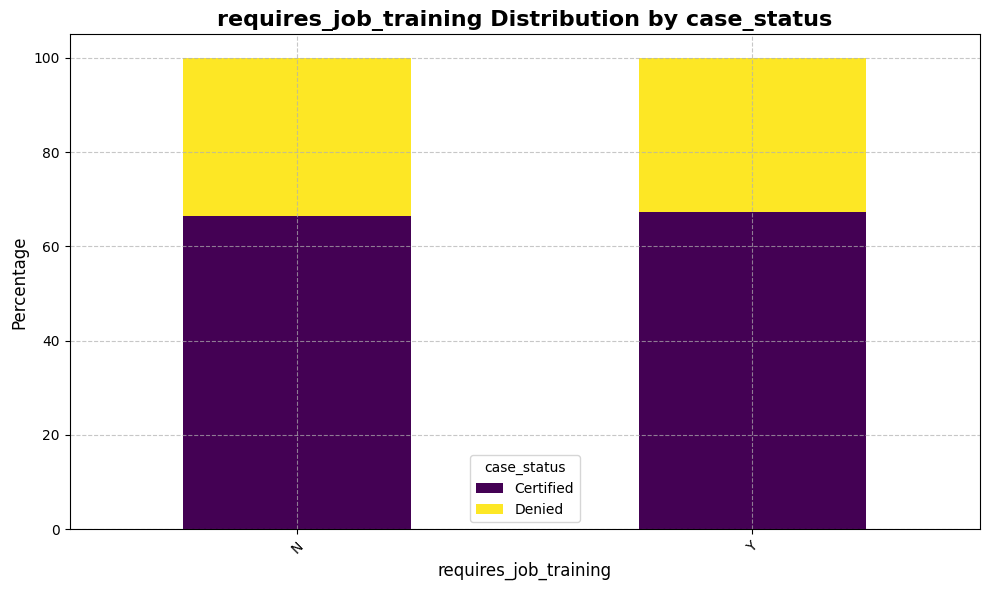

<Figure size 1000x600 with 0 Axes>

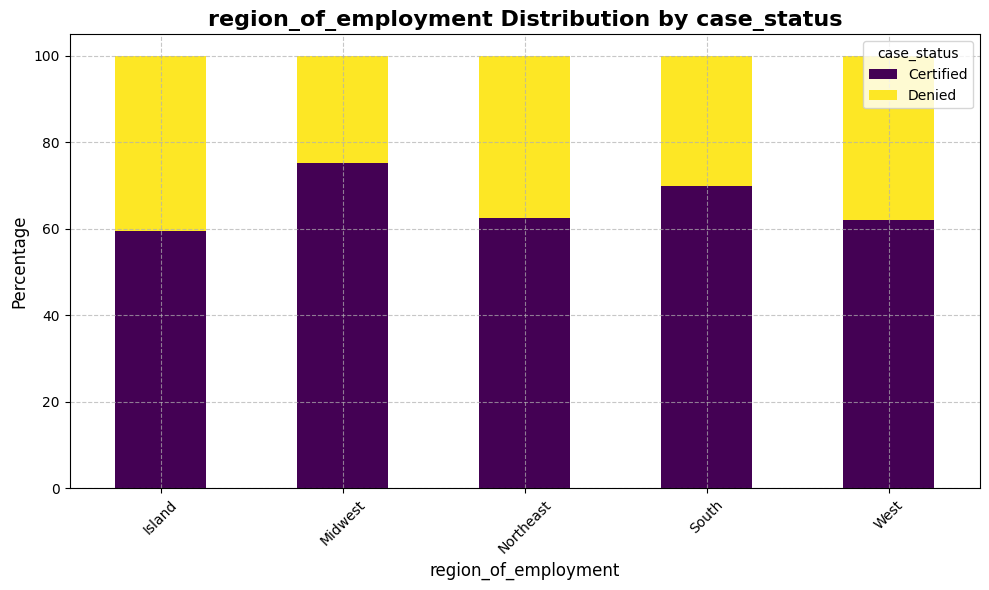

<Figure size 1000x600 with 0 Axes>

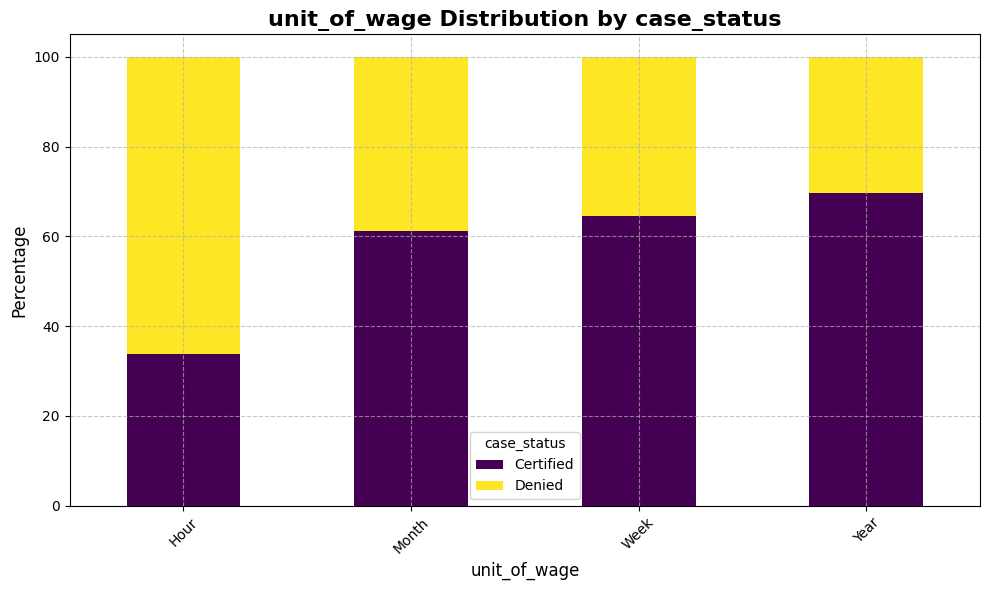

<Figure size 1000x600 with 0 Axes>

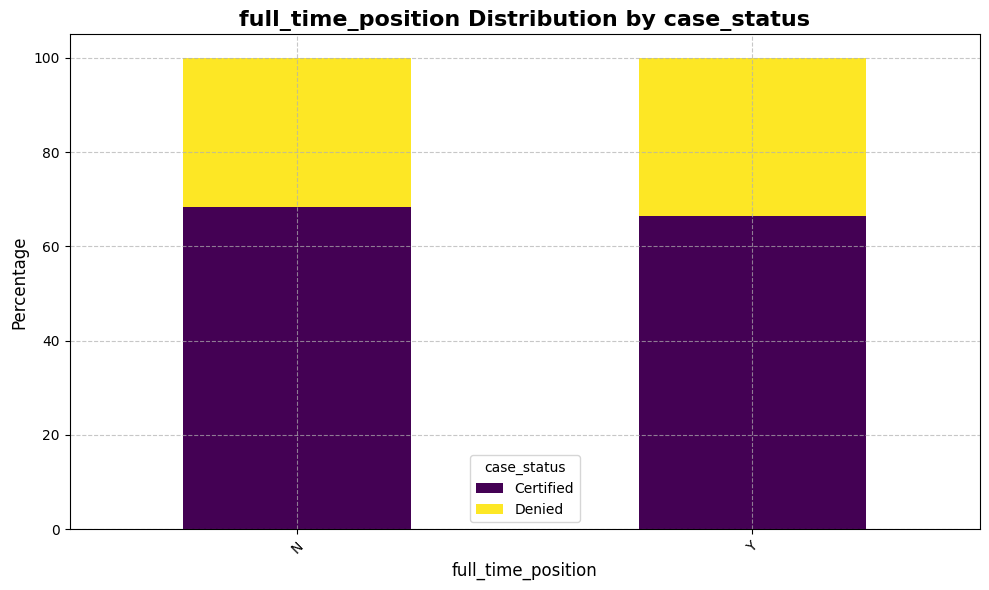

In [20]:
# List of categorical columns (excluding the target column)
categorical_columns = cleaned_df.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != target]
# Exclude 'case_id' from the categorical columns list if it exists
categorical_columns = [col for col in categorical_columns if col != 'case_id']


print("### Bivariate Analysis: Categorical Features vs Target ###")
# Visualizing the relationship between categorical features and the target using stacked bar charts
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    category_counts = cleaned_df.groupby([column, target]).size().unstack(fill_value=0)
    category_counts_percentage = category_counts.div(category_counts.sum(axis=1), axis=0) * 100

    # Stacked bar chart
    category_counts_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(f'{column} Distribution by {target}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.legend(title=target, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### **3. Multivariate Analysis**

**Purpose:**
To examine relationships among multiple variables simultaneously and identify patterns or correlations.

**Techniques:**
- **Numerical Variables**: Use pair plots or correlation heatmaps.
- **Categorical Data**: Use grouped bar plots or cluster analysis.

### Multivariate Analysis: Numerical Features ###


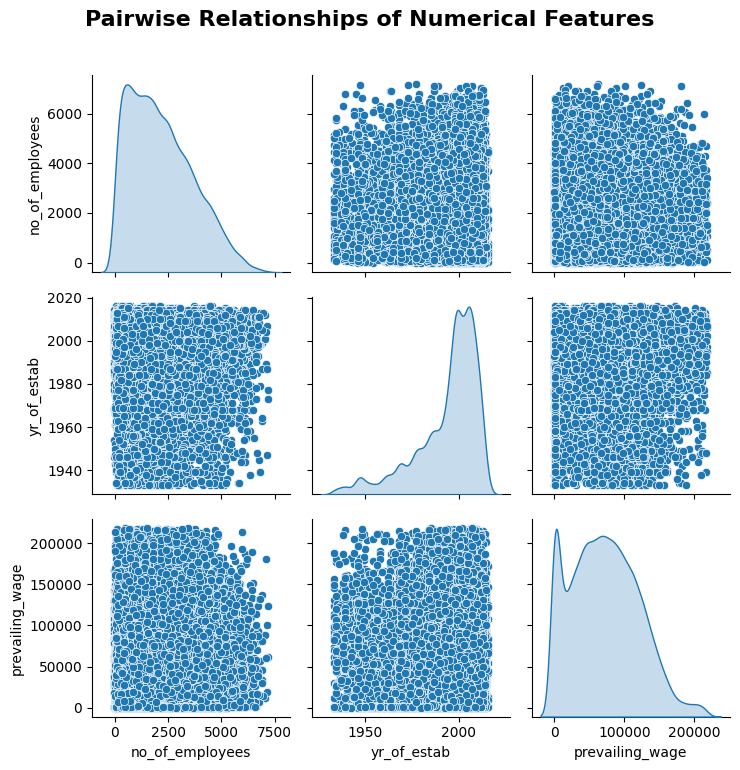

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int64']).columns

print("### Multivariate Analysis: Numerical Features ###")
# Pairplot to examine relationships between numerical features
sns.pairplot(cleaned_df[numerical_columns], diag_kind='kde', height=2.5, palette='Set2')
plt.suptitle('Pairwise Relationships of Numerical Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


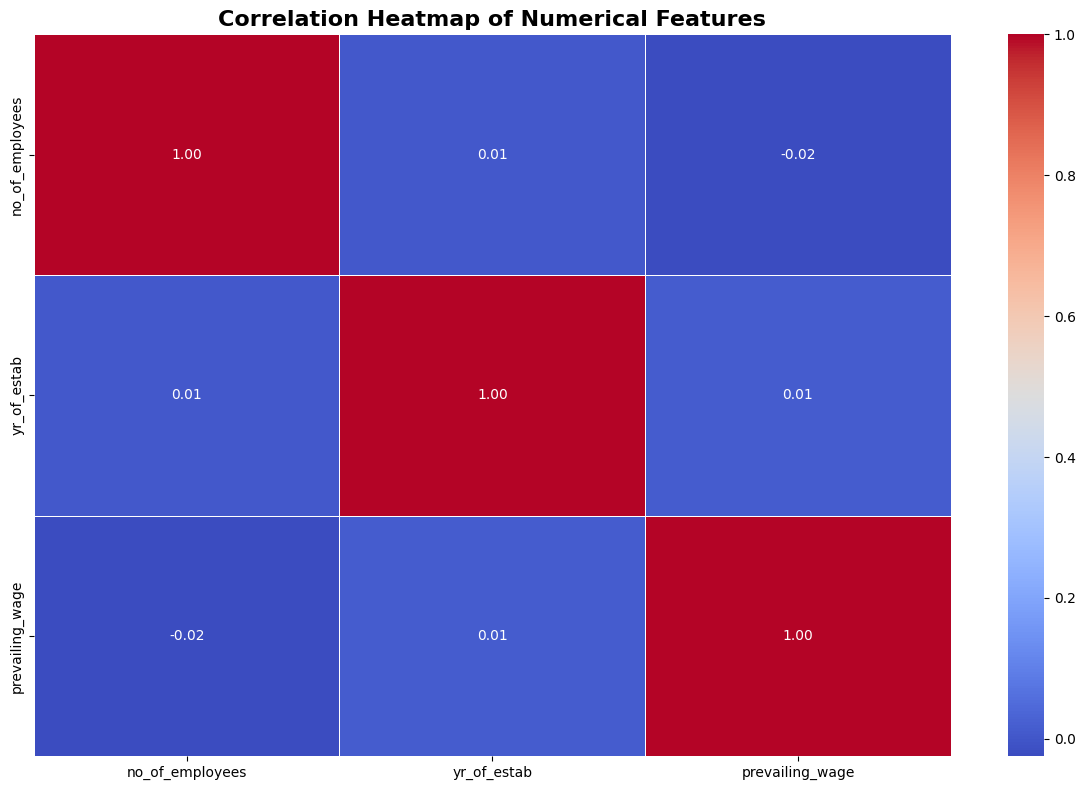

In [17]:
# Correlation heatmap to visualize relationships between numerical features
correlation_matrix = cleaned_df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


### Multivariate Analysis: Categorical Features vs Target ###


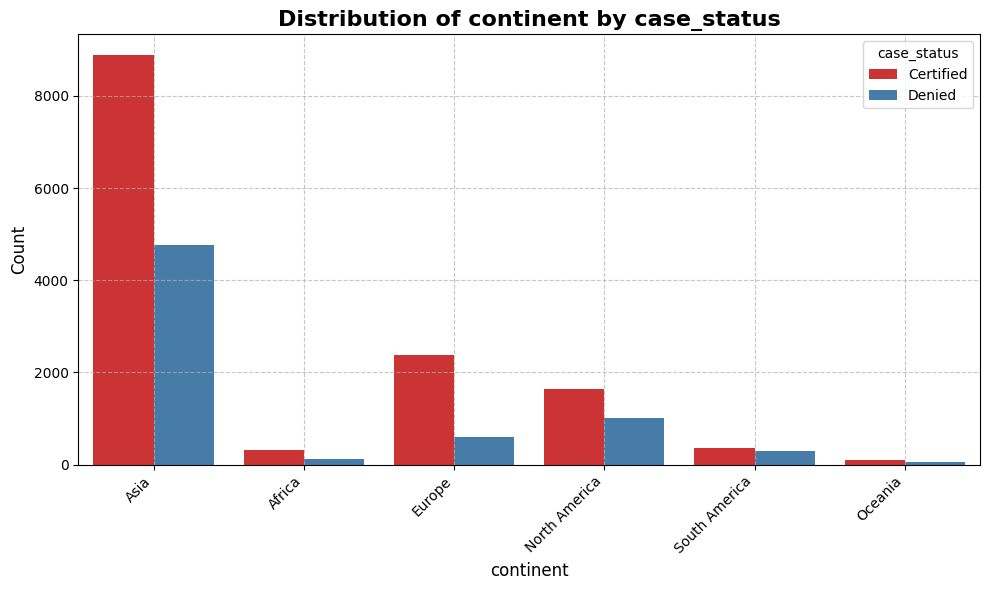

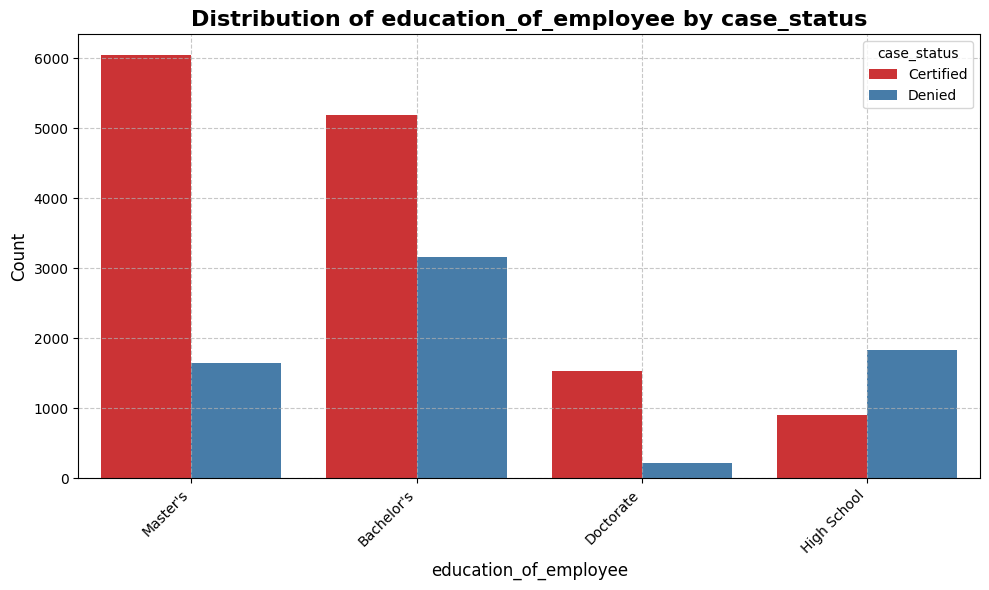

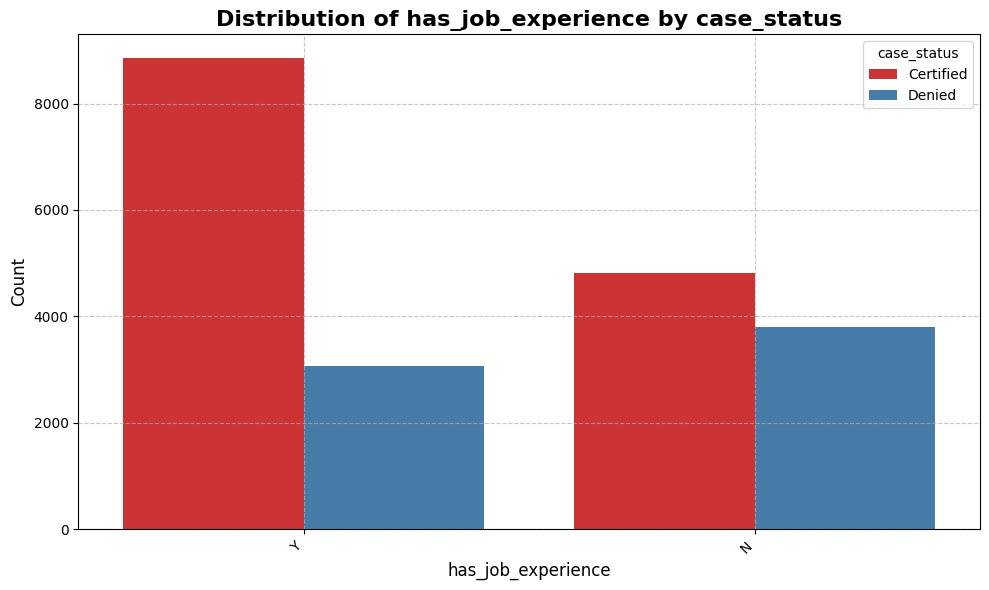

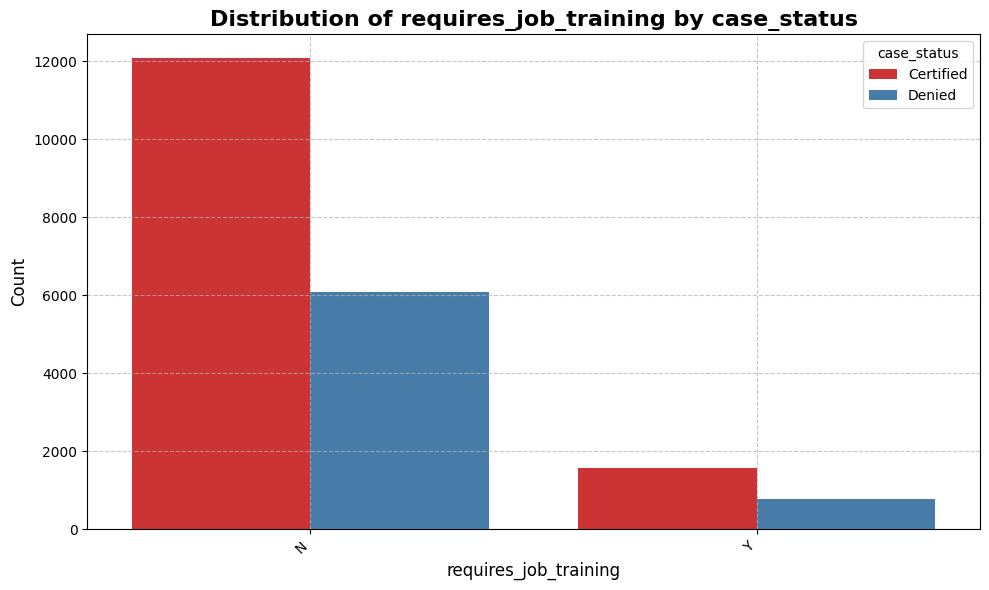

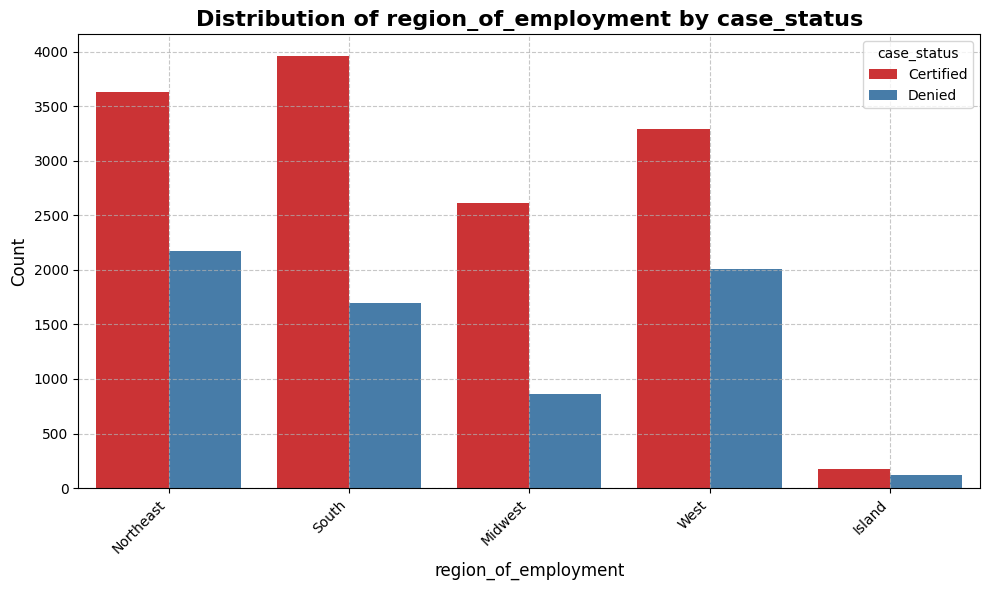

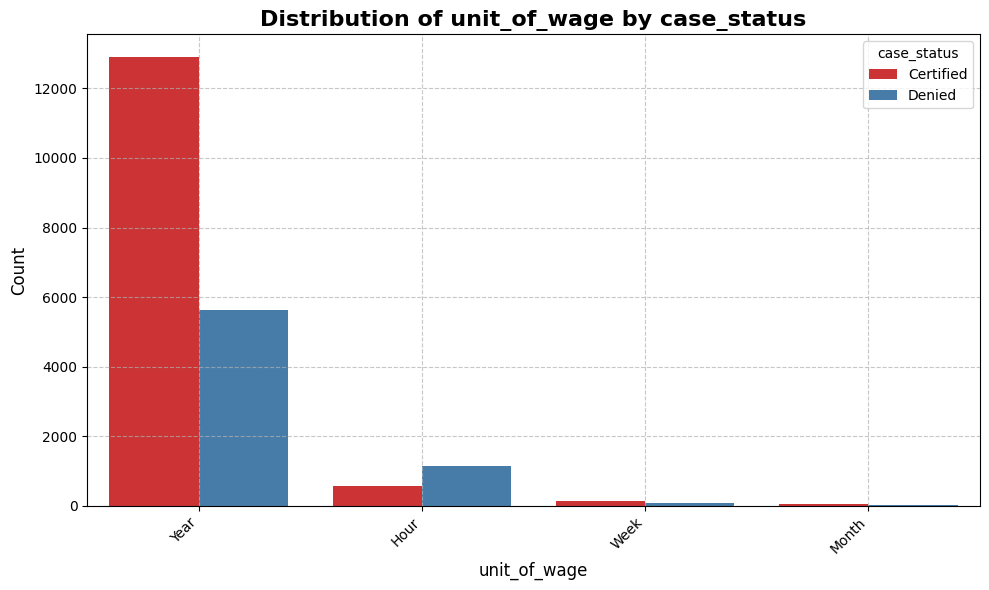

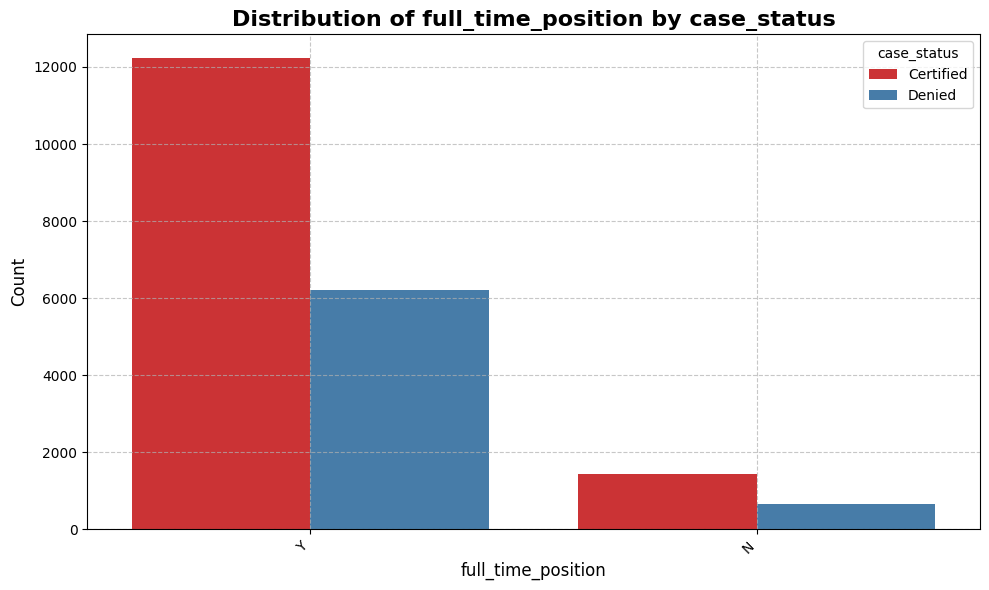

In [21]:
# Grouped bar plots to examine relationships between categorical features and the target variable
categorical_columns = cleaned_df.select_dtypes(include=['object']).columns
# Exclude 'case_id' from the categorical columns list if it exists
categorical_columns = [col for col in categorical_columns if col != 'case_id']

print("### Multivariate Analysis: Categorical Features vs Target ###")
for column in categorical_columns:
    if column != 'case_status':
        plt.figure(figsize=(10, 6))
        sns.countplot(data=cleaned_df, x=column, hue='case_status', palette='Set1')
        plt.title(f'Distribution of {column} by {target}', fontsize=16, fontweight='bold')
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.legend(title=target, fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


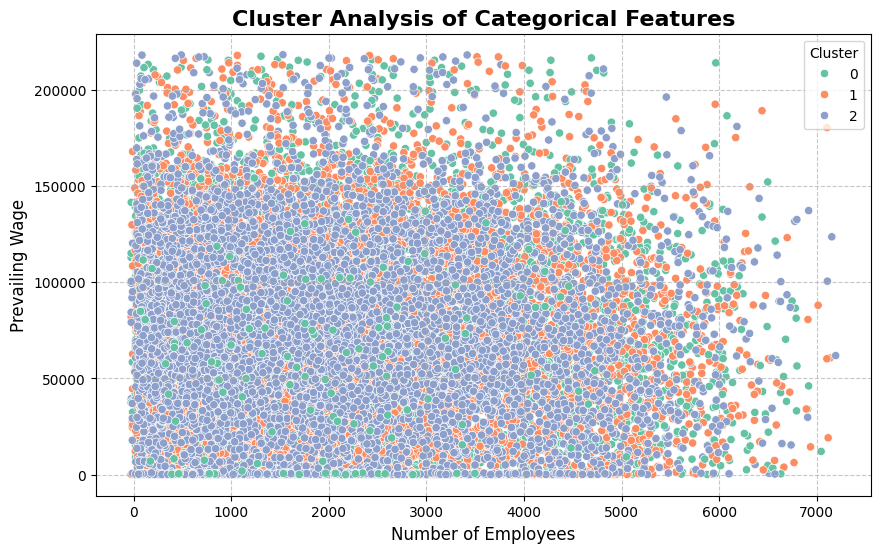

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Encode categorical features to numerical values for clustering
categorical_encoded_df = cleaned_df.copy()
label_encoder = LabelEncoder()
for column in categorical_columns:
    categorical_encoded_df[column] = label_encoder.fit_transform(categorical_encoded_df[column])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(categorical_encoded_df[categorical_columns])

# Add cluster labels to the dataframe
cleaned_df['Cluster'] = cluster_labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_df['no_of_employees'], y=cleaned_df['prevailing_wage'], hue=cleaned_df['Cluster'], palette='Set2')
plt.title('Cluster Analysis of Categorical Features', fontsize=16, fontweight='bold')
plt.xlabel('Number of Employees', fontsize=12)
plt.ylabel('Prevailing Wage', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
